# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from datetime import date
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
def get_weather_data(api_key, city, url):
    params = {
        "q": city,
        "appid": api_key
    }
    response = requests.get(url, params=params)
    return response.json()


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = get_weather_data(weather_api_key, city, url=url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}
                        )


    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | melekeok village
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | salinopolis
City not found. Skipping...
('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | presidente epitacio
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | yoloten
Processing Record 11 of Set 1 | cole harbour
Processing Record 12 of Set 1 | coffs harbour
Processing Record 13 of Set 1 | mata-utu
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | hammerfest
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | jamestown
Processing R

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,melekeok village,7.4957,134.6367,300.46,89,75,0.00,PW,1699627579
1,west island,-12.1568,96.8225,300.14,83,100,6.69,CC,1699627287
2,lata,40.1629,-8.3327,290.33,74,99,3.48,PT,1699627580
3,bredasdorp,-34.5322,20.0403,295.28,56,100,6.57,ZA,1699627580
4,ilulissat,69.2167,-51.1000,266.16,63,75,9.26,GL,1699627581


In [17]:
# Export the City_Data into a csv
if not os.path.exists("output_data"):
    os.mkdir("output_data")

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,melekeok village,7.4957,134.6367,300.46,89,75,0.00,PW,1699627579
1,west island,-12.1568,96.8225,300.14,83,100,6.69,CC,1699627287
2,lata,40.1629,-8.3327,290.33,74,99,3.48,PT,1699627580
3,bredasdorp,-34.5322,20.0403,295.28,56,100,6.57,ZA,1699627580
4,ilulissat,69.2167,-51.1000,266.16,63,75,9.26,GL,1699627581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

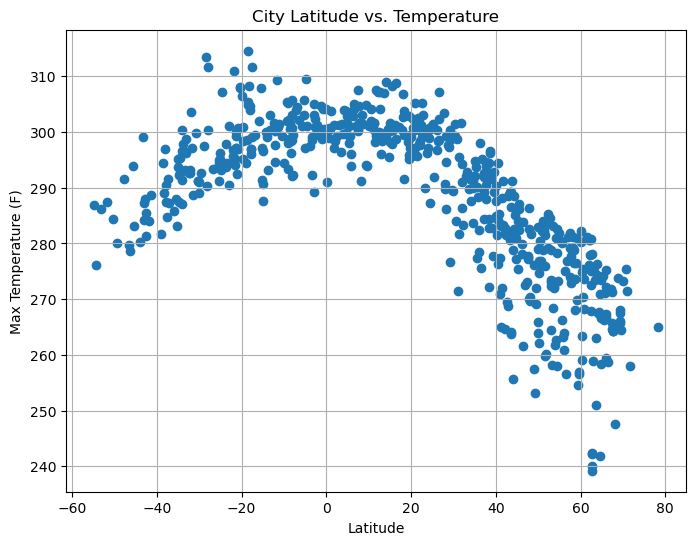

In [28]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])


plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

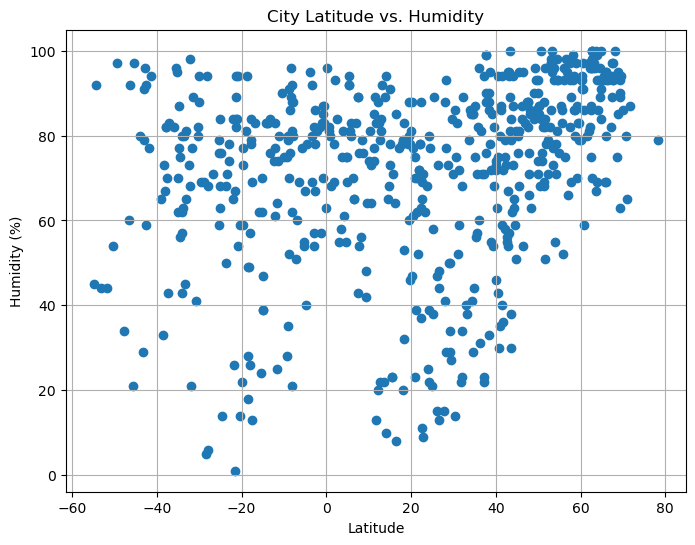

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

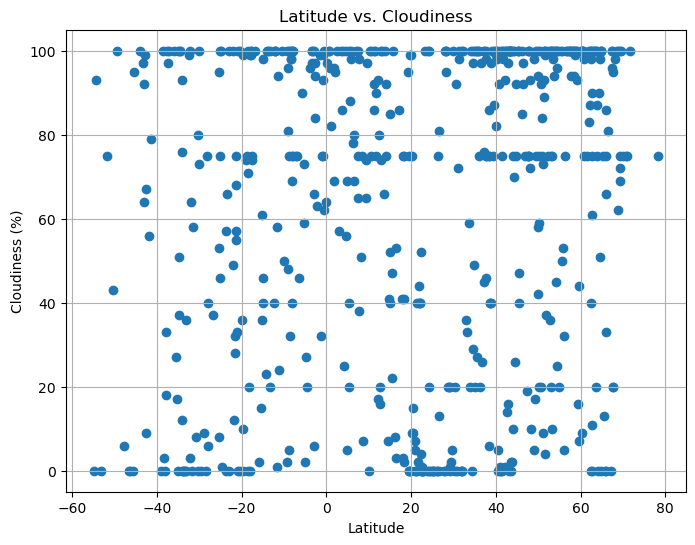

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

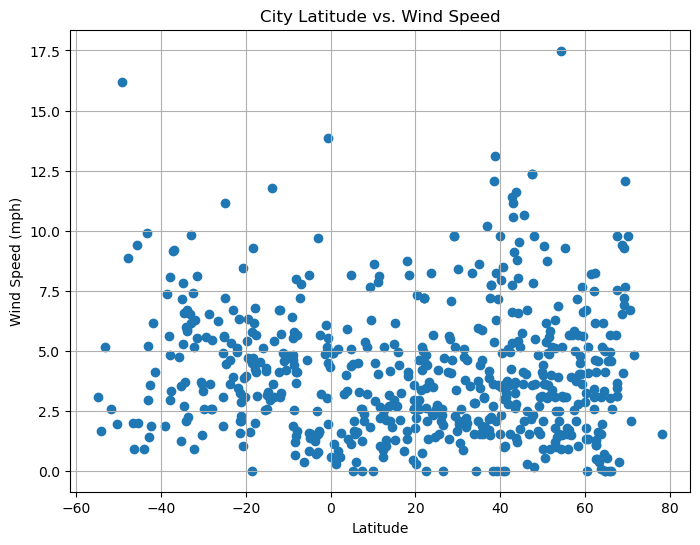

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Function to perform linear regression and plot the results
def plot_linear_regression(x_values, y_values, hemisphere, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r-value is:{r_value}")
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the linear equation and r-value
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(f"r-value = {round(r_value, 2)}", (min(x_values), min(y_values) + (max(y_values) - min(y_values)) / 10), fontsize=12, color="red")

    # Label the plot
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,melekeok village,7.4957,134.6367,300.46,89,75,0.00,PW,1699627579
2,lata,40.1629,-8.3327,290.33,74,99,3.48,PT,1699627580
4,ilulissat,69.2167,-51.1000,266.16,63,75,9.26,GL,1699627581
6,aykhal,66.0000,111.5000,259.38,95,66,3.01,RU,1699627581
7,longyearbyen,78.2186,15.6401,265.06,79,75,1.54,SJ,1699627580


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,300.14,83,100,6.69,CC,1699627287
3,bredasdorp,-34.5322,20.0403,295.28,56,100,6.57,ZA,1699627580
5,presidente epitacio,-21.7633,-52.1156,311.02,26,12,3.44,BR,1699627388
10,coffs harbour,-30.3000,153.1333,291.13,82,80,3.60,AU,1699627583
11,mata-utu,-13.2816,-176.1745,300.30,84,100,5.42,WF,1699627441


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8420241570883398


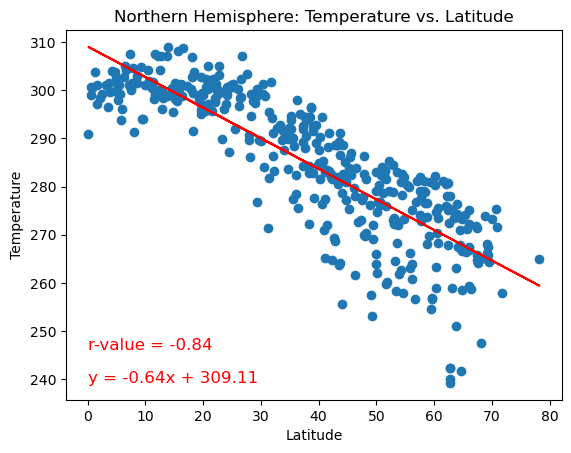

In [41]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"], "Northern", "Latitude", "Temperature")


The r-value is:0.6512511279037231


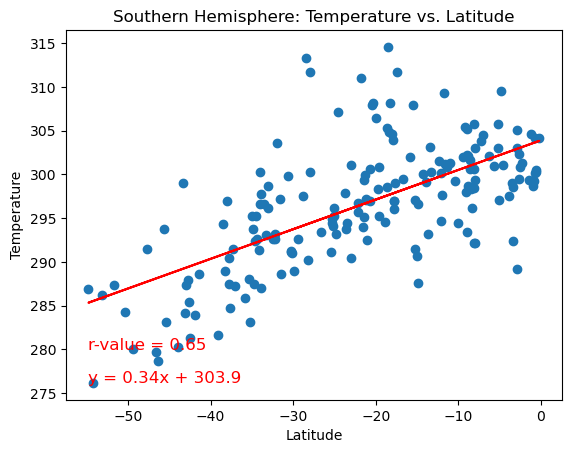

In [43]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"], "Southern", "Latitude", "Temperature")


**Discussion about the linear relationship:** 

- Northern Hemisphere: As latitude increases (moves away from the equator), maximum temperature  decrease. The negative slope indicates a negative correlation.
- Southern Hemisphere: As you move closer to the equator (lower latitude), maximum temperature increase. The positive slope indicates a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3821943140611902


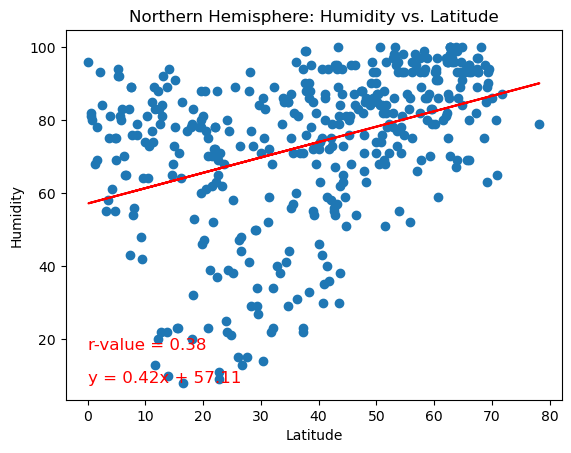

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df["Humidity"], "Northern", "Latitude", "Humidity")

The r-value is:0.05100276358682373


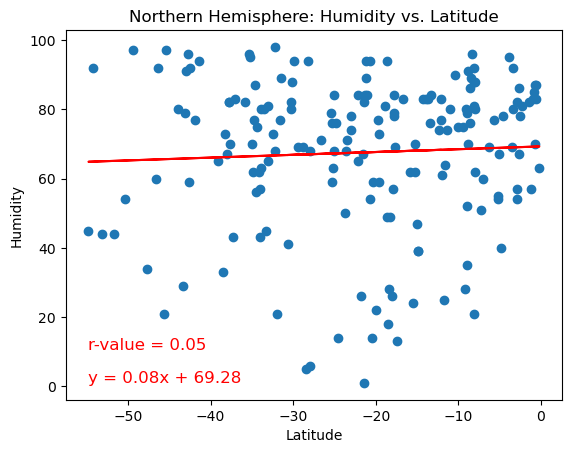

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df["Humidity"], "Northern", "Latitude", "Humidity")

**Discussion about the linear relationship:** 

There is a weak correlation between latitude and humidity. The data points are dispersed, and the slope is not very steep for both nothern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.1621044863236099


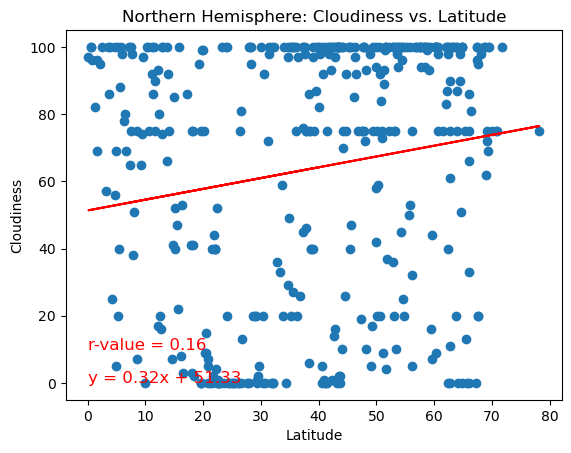

In [47]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"], "Northern", "Latitude", "Cloudiness")

The r-value is:0.2371286178135748


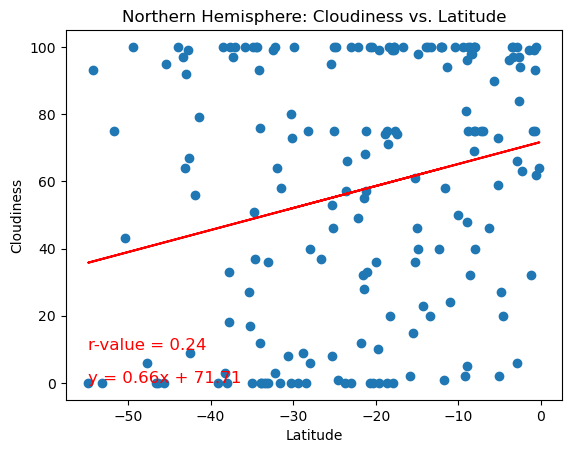

In [48]:
# Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"], "Northern", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** 

There is a weak correlation between latitude and coudness. The data points are dispersed, and the slope is not very steep for both nothern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.13426960429800622


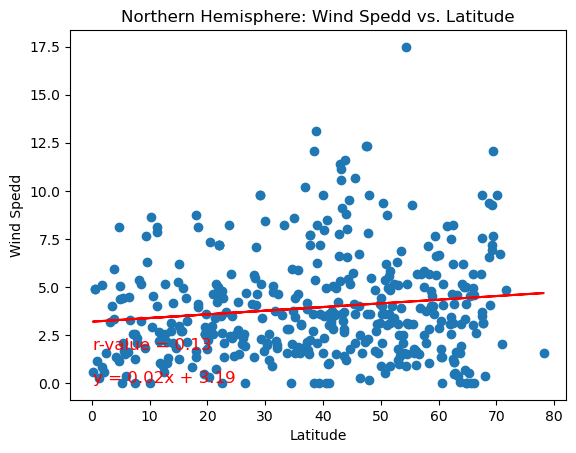

In [49]:
# Northern Hemisphere

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"], "Northern", "Latitude", "Wind Speed")

The r-value is:-0.12123100466482097


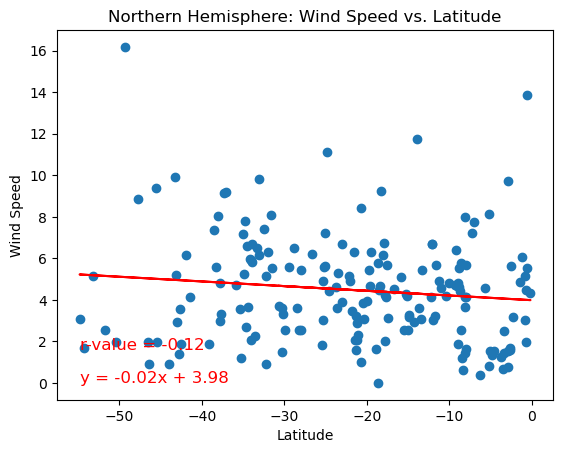

In [50]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"], "Northern", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** 

There is a weak correlation between latitude and wind speed. The data points are dispersed, and the slope is not very steep for both nothern and southern hemispheres.